In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
PATH = '/home/mehran/Desktop/AntAnalyze'
experiments_list = os.listdir(PATH)
experiment_seed = {}
for e in experiments_list:
    seed_list = os.listdir(os.path.join(PATH, e))
    experiment_seed[e] = seed_list

In [3]:
path_to_data = os.path.join(PATH, experiments_list[0], experiment_seed[experiments_list[0]][0])
data = pd.read_csv(path_to_data + '/csv/eval_data.csv')

In [4]:
for exp in experiments_list:
    num_seeds = len(experiment_seed[exp])
    path  = os.path.join(PATH, exp, 'seed0', 'csv', 'eval_data.csv')
    data_temp = pd.read_csv(path)
    num_samples = len(data_temp) - 1
    average_returns = np.zeros([num_seeds, num_samples])
    index = 0
    for seed in experiment_seed[exp]:
        path  = os.path.join(PATH, exp, seed, 'csv', 'eval_data.csv')
        data_temp = pd.read_csv(path)
        average_returns[index] = np.array(data_temp['average_return'])[:-1]
        index += 1

In [5]:
average = np.mean(average_returns, axis=0)
standard_error = np.std(average_returns, axis=0)/np.sqrt(average_returns.shape[0])

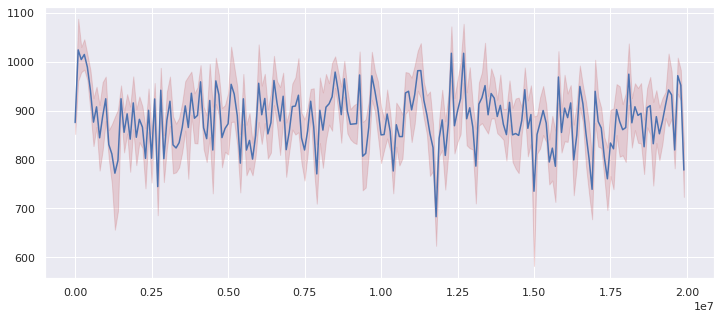

In [21]:
x = np.array(data['num_time_steps'])[:-1]
plt.figure(figsize=(12, 5))
plt.plot(x, average, 'b')
plt.fill_between(x, average-standard_error, average+standard_error, color='r', alpha=0.2)
sns.set_style("dark")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_style("whitegrid")
sns.set_theme()
plt.savefig('test.jpg', dpi=300)
plt.show()

In [8]:
df = pd.DataFrame({'time steps': np.array(data['num_time_steps'])[:-1], 'average': average}).plot

<AxesSubplot:>

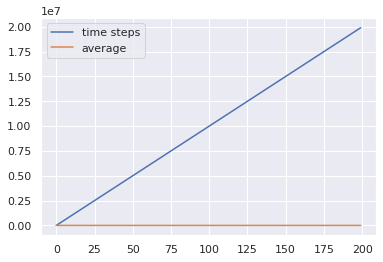

In [10]:
pd.DataFrame({'time steps': np.array(data['num_time_steps'])[:-1], 'average': average}).plot()